 # PropTech: Strategic Rental Investment Insights

###  Explored multi-source real estate data, leveraging advanced feature engineering and comprehensive EDA to identify key drivers of rental property investment opportunities.

In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import random
from datetime import datetime



In [25]:

num_properties = 2000 

random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)   

# Define some typical ranges for our property data, like in Jaipur.

property_price_min = 3000000  # Minimum property price
property_price_max = 80000000 # Maximum property price

rent_price_factor_min = 0.015 
rent_price_factor_max = 0.03

bedrooms_min = 1
bedrooms_max = 5

sq_footage_min = 500  # Square feet
sq_footage_max = 3500

year_built_min = 1980
year_built_max = 2024

# Types of properties and their quality levels
property_types = ['Apartment', 'House', 'Villa', 'Studio']
property_conditions = ['Excellent', 'Good', 'Fair', 'Needs Renovation']
amenities_levels = ['High', 'Medium', 'Low']

# Creating our Properties Data 
properties_data = []

# This loop will run 'num_properties' times (2000 times), creating one fake property each time.
for i in range(num_properties):
    # Give each property a unique ID number
    property_id = i + 1
    
    # Pick a random number of bedrooms for this property
    bedrooms = random.randint(bedrooms_min, bedrooms_max)
    
    # Pick a random square footage
    square_footage = random.randint(sq_footage_min, sq_footage_max)
    
    # Pick a random year it was built
    year_built = random.randint(year_built_min, year_built_max)
    
    # Pick a random property type from our list
    property_type = random.choice(property_types)
    
    # Pick a random condition
    property_condition = random.choice(property_conditions)
    
    # Pick a random amenities level
    amenities_level = random.choice(amenities_levels)
    
    # Simulate the listing price, rounding to the nearest thousand for neatness
    listing_price = np.round(np.random.uniform(property_price_min, property_price_max), -3)
    
    # Simulate the current monthly rent based on the listing price
    current_rent = np.round(listing_price * np.random.uniform(rent_price_factor_min, rent_price_factor_max), -2)

    # Add this property's details to our list
    properties_data.append({
        'property_id': property_id,
        'bedrooms': bedrooms,
        'square_footage': square_footage,
        'year_built': year_built,
        'property_type': property_type,
        'property_condition': property_condition,
        'amenities_level': amenities_level,
        'listing_price': listing_price,
        'current_rent': current_rent
    })

# Now, convert our list of property details into a proper pandas DataFrame (table).
df_proptech = pd.DataFrame(properties_data)

# --- 1.3. Creating Simple Neighborhood Features ---
# Instead of many neighborhoods, we'll assign some simple neighborhood qualities directly.
# This makes it easier to understand without needing separate tables.

# Simulate a "school quality" score (e.g., from 1 to 10)
df_proptech['school_quality_score'] = np.round(np.random.uniform(4, 9.5, num_properties), 1)

# Simulate a "crime index" (lower number means safer, e.g., from 20 to 80)
df_proptech['crime_index'] = np.round(np.random.uniform(20, 80, num_properties), 0)

# Simulate how close it is to public transport (e.g., 1 = Far, 5 = Very Close)
df_proptech['transport_proximity_score'] = np.random.randint(1, 6, num_properties) # 1 to 5

# Calculate "Rental Yield": This is a key metric for investors!
# It's the annual rent divided by the property price. Higher is usually better.
# (current_rent * 12) is the annual rent.
df_proptech['rental_yield'] = (df_proptech['current_rent'] * 12) / df_proptech['listing_price']

# Calculate "Price per Square Foot": Helps compare properties of different sizes fairly.
df_proptech['price_per_sqft'] = df_proptech['listing_price'] / df_proptech['square_footage']

# Calculate "Age of Property": How old is the property right now?
current_year = datetime.now().year # Get the current year
df_proptech['age_of_property'] = current_year - df_proptech['year_built']

# Simulating the "Investment Opportunity Score"
# This is the number our machine learning model will try to predict.

# First, let's convert our text-based 'condition' and 'amenities' into numbers,
condition_map = {'Excellent': 5, 'Good': 4, 'Fair': 3, 'Needs Renovation': 1}
amenities_map = {'High': 5, 'Medium': 3, 'Low': 1}

df_proptech['property_condition_numeric'] = df_proptech['property_condition'].map(condition_map)
df_proptech['amenities_level_numeric'] = df_proptech['amenities_level'].map(amenities_map)


# Now, the formula for the Investment Opportunity Score:

df_proptech['investment_opportunity_score'] = (
    # Positive factors (higher is better)
    (df_proptech['rental_yield'] * 500) +           # Very important for investors
    (df_proptech['school_quality_score'] * 3) +     # Good schools are a plus
    (df_proptech['transport_proximity_score'] * 5) + # Easy transport is good
    (df_proptech['property_condition_numeric'] * 4) + # Better condition = higher score
    (df_proptech['amenities_level_numeric'] * 3) +  # Good amenities add value

    # Negative factors (higher value means worse, so we subtract)
    (df_proptech['crime_index'] * -0.5) +           # High crime lowers the score
    (df_proptech['age_of_property'] * -0.1)       # Very old properties might be less appealing

)

# Finally, scale the scores to be between 10 and 90, so they are easy to understand.
min_score = df_proptech['investment_opportunity_score'].min()
max_score = df_proptech['investment_opportunity_score'].max()
df_proptech['investment_opportunity_score'] = 10 + (df_proptech['investment_opportunity_score'] - min_score) / (max_score - min_score) * 80
df_proptech['investment_opportunity_score'] = df_proptech['investment_opportunity_score'].round(2) # Round to 2 decimal places

# Show the first few rows of our new data table
print("First 5 rows of our created dataset:")
print(df_proptech.head())

# Show a summary of the data: how many rows, columns, and data types
print("\nInformation about our dataset (columns, data types):")
df_proptech.info()

# Show statistics for numbers in our dataset (average, min, max, etc.)
print("\nStatistical summary of numerical columns:")
print(df_proptech.describe())

print(f"\nExample of Investment Opportunity Scores:\n{df_proptech['investment_opportunity_score'].sample(10)}")

First 5 rows of our created dataset:
   property_id  bedrooms  square_footage  year_built property_type  \
0            1         1             602        1997         House   
1            2         1            3271        2014     Apartment   
2            3         1             883        1993         House   
3            4         2            3432        2021        Studio   
4            5         5            1639        1980         House   

  property_condition amenities_level  listing_price  current_rent  \
0               Good            High     31840000.0      931700.0   
1   Needs Renovation            High     59364000.0     1423500.0   
2          Excellent             Low     15013000.0      260300.0   
3               Good          Medium      7472000.0      209200.0   
4   Needs Renovation          Medium     49286000.0     1262800.0   

   school_quality_score  crime_index  transport_proximity_score  rental_yield  \
0                   7.1         59.0          


--- Starting Basic Data Exploration (EDA) ---


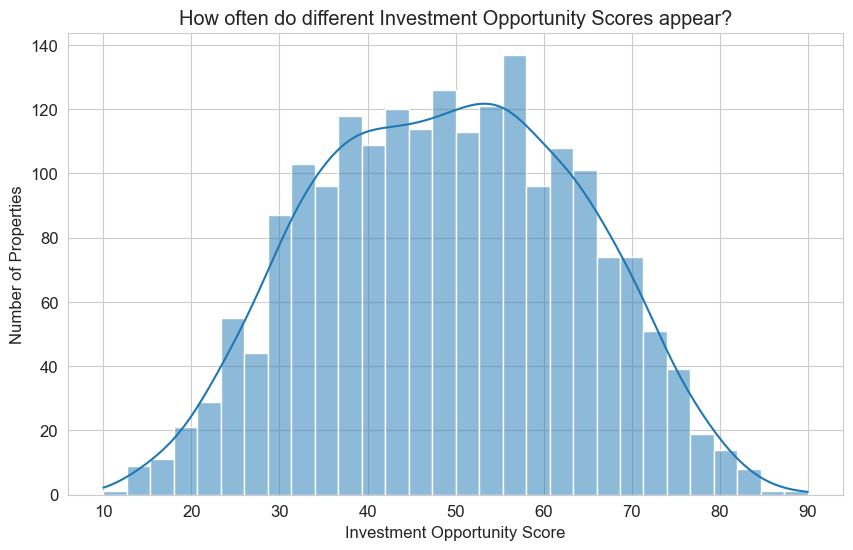

In [29]:
print("\n--- Starting Basic Data Exploration (EDA) ---")

# 
# A histogram shows how often different scores appear.

plt.figure(figsize=(10, 6))
sns.histplot(df_proptech['investment_opportunity_score'], kde=True, bins=30)# 'kde=True' draws a smooth line over the bars 
plt.title('How often do different Investment Opportunity Scores appear?')
plt.xlabel('Investment Opportunity Score')
plt.ylabel('Number of Properties')
plt.show()



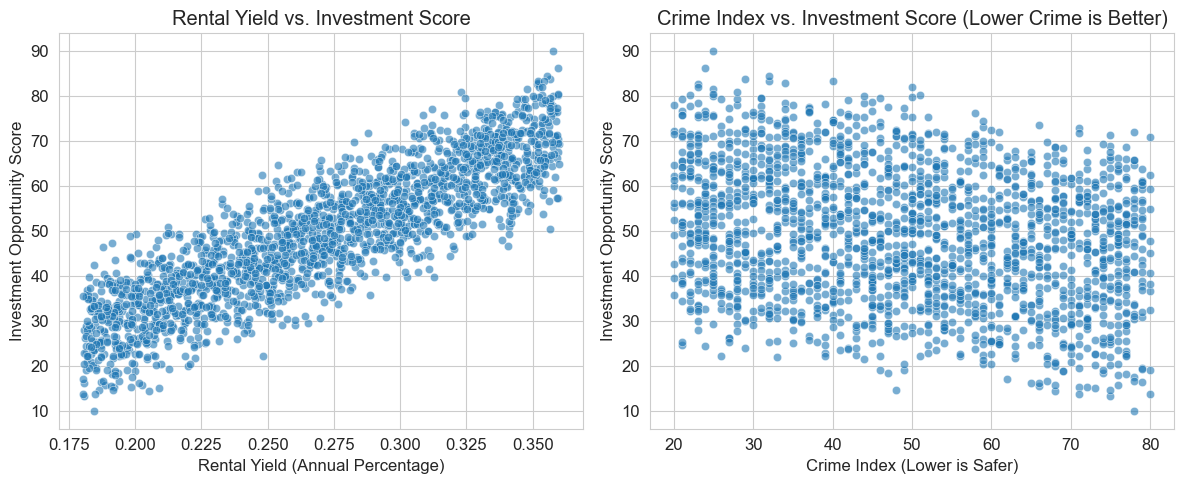

In [31]:

# Scatter plots show if two numbers have a relationships, higher rental yield mean a higher score?

plt.figure(figsize=(12, 5)) # Create a figure to hold two plots

# Plot 1: Rental Yield vs. Investment Score
plt.subplot(1, 2, 1) # This means 1 row, 2 columns, this is the 1st plot
sns.scatterplot(x='rental_yield', y='investment_opportunity_score', data=df_proptech, alpha=0.6)
plt.title('Rental Yield vs. Investment Score')
plt.xlabel('Rental Yield (Annual Percentage)')
plt.ylabel('Investment Opportunity Score')

# Plot 2: Crime Index vs. Investment Score
plt.subplot(1, 2, 2) # This is the 2nd plot
sns.scatterplot(x='crime_index', y='investment_opportunity_score', data=df_proptech, alpha=0.6)
plt.title('Crime Index vs. Investment Score (Lower Crime is Better)')
plt.xlabel('Crime Index (Lower is Safer)')
plt.ylabel('Investment Opportunity Score')
plt.tight_layout() # Makes sure plots don't overlap
plt.show()



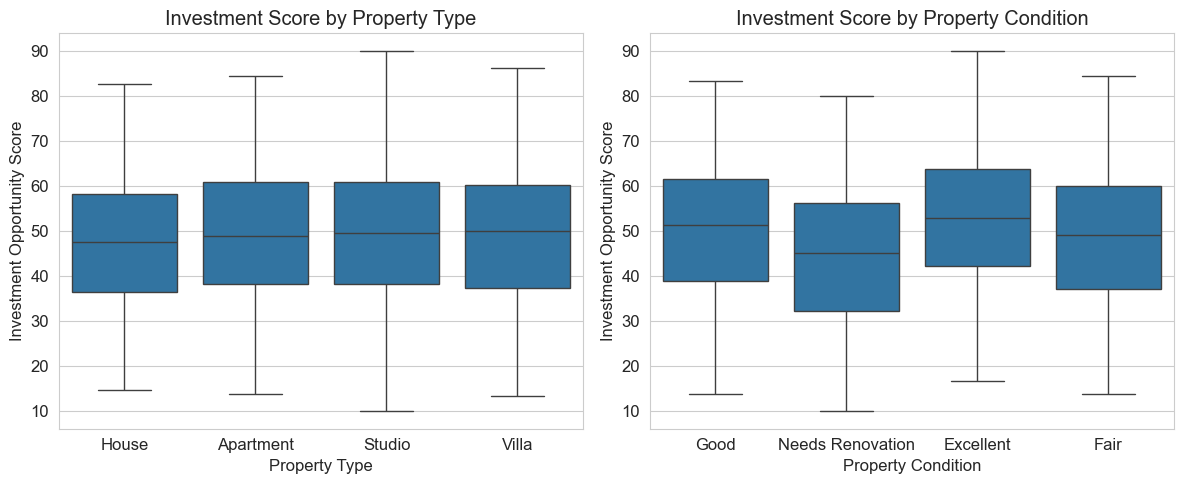

In [35]:
# Box plots show the range of scores for different categories (like property types).
plt.figure(figsize=(12, 5))

# Plot 1: Property Type vs. Investment Score
plt.subplot(1, 2, 1)
sns.boxplot(x='property_type', y='investment_opportunity_score', data=df_proptech)
plt.title('Investment Score by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Investment Opportunity Score')

# Plot 2: Property Condition vs. Investment Score
plt.subplot(1, 2, 2)
sns.boxplot(x='property_condition', y='investment_opportunity_score', data=df_proptech)
plt.title('Investment Score by Property Condition')
plt.xlabel('Property Condition')
plt.ylabel('Investment Opportunity Score')
plt.tight_layout()
plt.show()


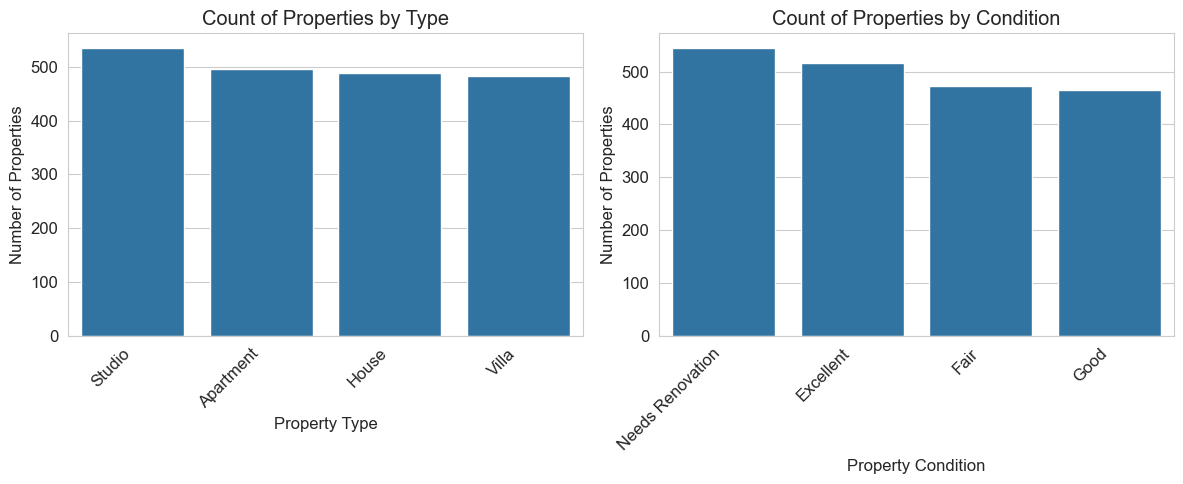

In [38]:
# Count plots show how many properties fall into each category (e.g., how many 'Apartments' vs. 'Houses').
plt.figure(figsize=(12, 5))

# Plot 1: Distribution of Property Types
plt.subplot(1, 2, 1)
sns.countplot(x='property_type', data=df_proptech, order=df_proptech['property_type'].value_counts().index)
plt.title('Count of Properties by Type')
plt.xlabel('Property Type')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45, ha='right')

# Plot 2: Distribution of Property Conditions
plt.subplot(1, 2, 2)
sns.countplot(x='property_condition', data=df_proptech, order=df_proptech['property_condition'].value_counts().index)
plt.title('Count of Properties by Condition')
plt.xlabel('Property Condition')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()